# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 2

**Правила:**

* Решения задач нужно отправить через <a target="_blank" href="https://forms.gle/Em5zUeLcUH4hSntRA">форму</a>. Если ответ пришел, придет ответ от автоответчика. Изменять решения до дедлайна можно по кнопке "изменить ответ", которая находится в письме от автоответчика.
* Дедлайн **10 мая 23:59**. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины. Даже если форма еще открыта, что делается для сдающих позже по уважительной причине.
* Любую уважительную причину нужно подтвердить документально, прикрепив скан или фото в форму.
* **По задачам 1-2** необходимо отправить фото в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. **Каждую задачу необходимо отправить отдельной фотографией без посторонних записей.**
* **По задачам 3-6** необходимо отправить ноутбук с **выполненным кодом**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

In [40]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$&mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$. 
* Найдите асимптотически нормальную оценку $\theta$;
* Постройте асимптотический доверительный интервал на $\theta$.


-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из распределения Лапласа с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$. Найдите асимптотический доверительный интервал для параметра $\theta$.

-----


### Задача 3
В этой задаче нужно визуализировать *свойство асимптотической нормальности*. Посмотрите также на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">этот ноутбук</a>.

*a).* Пусть $X_1, ..., X_n$&mdash; выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\widehat{\theta} = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

<a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">посчитайте</a> оценки  $\widehat{\theta}_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 1$.

In [7]:
th_hat = np.zeros((300, 500))
zet = np.zeros((300, 500))
n = np.linspace(1, 501, 500)
th = 1

for i in range(300):
    sample = sps.uniform.rvs(size=500)
    sample_1 = np.cumsum(sample)/n
    
    th_hat[i] = 2 * sample_1
    zet[i] = pow(n,0.5)*(th_hat[i] - th)

    

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ <a href="https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html">с помощью `plt.plot`</a>. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

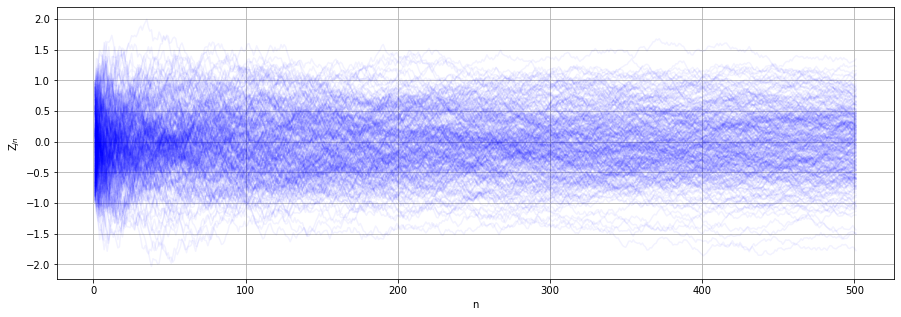

In [13]:
plt.figure(figsize=(15, 5))
for i in range(300):
    plt.plot(n, zet[i], color = 'blue', alpha = 0.05)

plt.xlabel('n')
plt.ylabel('Z$_{jn}$')
plt.grid()         
plt.show()


Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture4_means.html#3.-Когда-придет-мой-автобус?-Или-каково-среднее-время-ожидания-автобуса.">гистограмму и график плотности</a> распределения $\mathcal{N}(0, 1)$.  Не забудьте сделать легенду.

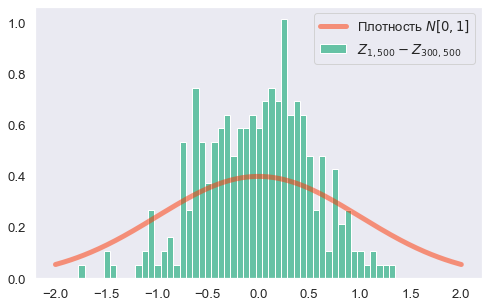

In [39]:
grid = np.linspace(-2, 2, 300)

plt.figure(figsize=(8, 5))
plt.hist(zet[:, 499], bins=50, density=True, label='$Z_{1,500} - Z_{300,500}$')
plt.plot(grid, sps.norm(loc = 0, scale=1).pdf(grid), lw=5, alpha=0.5, 
         label='Плотность $N[0, 1]$', color='#FF3300')
plt.legend()
plt.grid()
plt.show()

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** Асимптотическая нормальность означает, что распределение ас норм оценки должно стремиться к нормальному распределению. Для гистограммы это похоже на правду, возможно, оно стремится к нормальному распределению с другими параметрами, но и (0,1) тоже дает подтверждение теоретическим свойствам. Для графика значения Z$_{jn}$ для больших выборок лежат в пределах (-0.5, 0.5) и как будто стремятся к 0, наибольшая плотность около 0, как и для нормального распределния.

----

## Задачи типа B (необходимо на "отл")

----
### Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Пусть выборка $X_1, ... X_{100}$ имеет распределение $Bern(\theta)$. <a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> такую выборку, взяв $\theta=1/2$. Для каждой подвыборке вида $X_1, ... X_i$, $1 \le i \le 100$ постройте асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha=0.95$. Формула для интервала была выведена на семинаре. Постройте график зависимости доверительного интервала от размера выборки (см. <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html">код с семинара</a>). 

Аналогичные действия выполните для выборки из распределения Лапласса с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$, сгенерировав выборку для $\theta=0$.

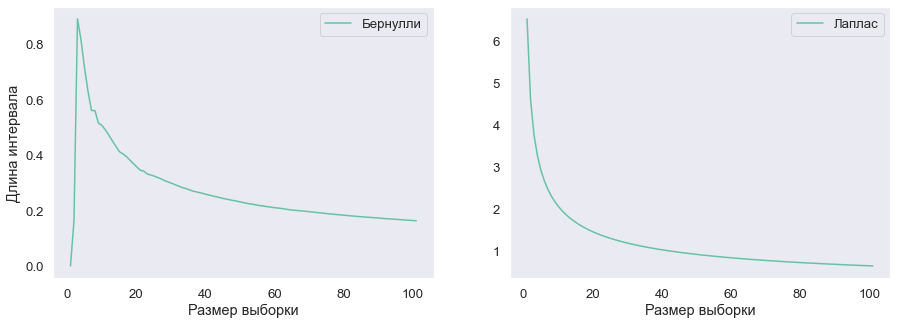

In [178]:
grid = np.linspace(1, 101, 100)

sample_b = sps.bernoulli.rvs(0.5, loc = 0, size = 100)
sample_l = sps.laplace.rvs(size=100)
sample_norm = sps.norm.rvs(size = 100)

q = (1+0.95)/2
quantile = np.quantile(sample_norm,q)

interval_b = np.zeros(100)
interval_l = np.zeros(100)

csum_b = np.cumsum(sample_b)/grid
csum_l = np.cumsum(sample_l)/grid



for i in range(1,101,1):
    left_b = csum_b[i-1] - quantile * pow((csum_b[i-1]/i*(1 - csum_b[i-1])), 0.5)
    right_b = csum_b[i-1] + quantile * pow((csum_b[i-1]/i*(1 - csum_b[i-1])), 0.5)
    
    left_l = csum_l[i-1] - quantile * pow(4/i, 0.5)
    right_l = csum_l[i-1] + quantile * pow(4/i, 0.5)
    
    interval_b[i-1] = abs(left_b - right_b)
    interval_l[i-1] = abs(left_l - right_l)
    

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(grid, interval_b,label = 'Бернулли')
plt.xlabel('Размер выборки')
plt.ylabel('Длина интервала')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(grid, interval_l,label = 'Лаплас')
plt.xlabel('Размер выборки')
plt.legend()
plt.grid()

plt.show()


    
    


**Вывод:** Длина доверительного интервала уменьшается при увеличении размера выборки. Длина интервала меньше для распределения Бернулли, для распределения Лапласа кривая плавнее, вероятно, потому что распределение непрерывное, в отличие от дискретного Бернулли

__________________
### Задача 5

Если у вас еще не установлена <a href="https://mipt-stats.gitlab.io/courses/python/09_seaborn.html">библиотека `seaborn`</a> для получения красивых графиков, поставьте ее.

In [77]:
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')

Загрузим данные <a target="_blank" href="https://ru.wikipedia.org/wiki/Ирисы_Фишера">"Ирисы Фишера"</a> о цветках ириса различных сортов и посмотрим на первые пять строк таблицы. Для хранения данных используется класс <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html#2.-Тип-данных-DataFrame">`DataFrame`</a> библиотеки <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html">`pandas`</a>.

In [78]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Столбцы отвечают за длину и ширину чашелистика и лепестка соответственно, а так же за тип цветка (setosa, virginica, versicolor).

Вектор значений первого столбца можно получить так

In [79]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

Первую строку можно получить так

In [80]:
df.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Таблица с данными только по сорту virginica извлекается следующим образом

In [81]:
df[df['species'] == 'virginica']

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


Визуализируем данные по двумерным проекциям. Цветом обозначен тип цветка.

C:\Users\Olga\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
No handles with labels found to put in legend.


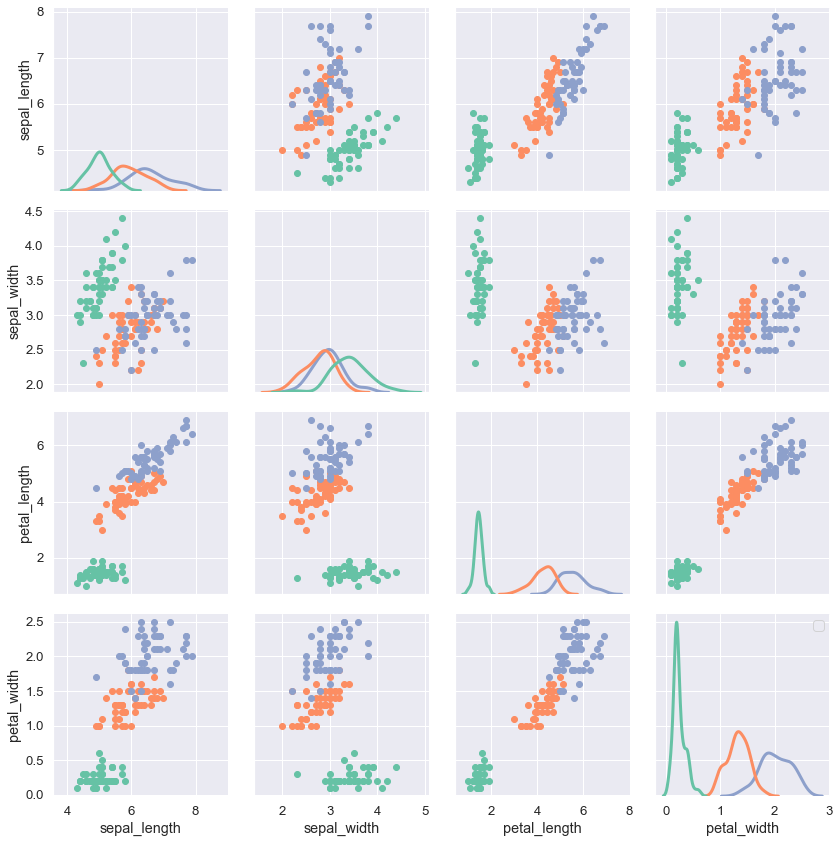

In [82]:
g = sns.PairGrid(df, hue='species', size=3)
g.map_offdiag(plt.scatter, cmap ="Blues_d")
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Для каждой характеристики цветка и каждого типа цветка проверьте с помощью <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Шапиро-Уилка">критерия Шапиро-Уилка</a>, является ли соответствующая выборка нормальной с уровнем значимости $\alpha=0.05$. Всего нужно совешить 12 проверок (4 характеристики, 3 типа). Например, нужно проверить, является ли выборка `df[df['species'] == 'virginica']['sepal_length']` нормальной.

In [118]:
spcs = ['setosa', 'versicolor', 'virginica']
ch = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for s in spcs:
    for c in ch:
        print(s, c, ':')
        print(sps.shapiro(df[df['species'] == s][c]))
        print()


setosa sepal_length :
ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635)

setosa sepal_width :
ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)

setosa petal_length :
ShapiroResult(statistic=0.9549766182899475, pvalue=0.05481043830513954)

setosa petal_width :
ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)

versicolor sepal_length :
ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867)

versicolor sepal_width :
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

versicolor petal_length :
ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503)

versicolor petal_width :
ShapiroResult(statistic=0.947626531124115, pvalue=0.027278218418359756)

virginica sepal_length :
ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)

virginica sepal_width :
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

virginica petal_length :
ShapiroResult

Отверглась для versicolor petal_width и setosa petal_width

Теперь для каждой характеристики для всех пар типов цветка проверьте с уровнем значимости $\alpha=0.05$, отличаются ли значения данной харатеристики для этих типов цветков. Если для обоих выборок нормальность выше не отверглась, используйте <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#T-критерий%20Стьюдента%20—%20независимые%20выборки">критерий Стьюдента</a>, иначе пользуйтесь <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Смирнова">критерием Смирнова</a>. Например, нужно проверить, отличаются ли распределения выборкок `df[df['species'] == 'setosa']['sepal_length']` и `df[df['species'] == 'virginica']['sepal_length']`.

*Замечание*. Для применения критерия Стьюдента было бы правильнее предварительно проверить, что дисперсии выборок совпадает, но в данном задании это можно не делать.

In [133]:
from itertools import combinations

#Student
data = list(combinations(spcs, 2))

for c in ch:
    for j in range(len(data)):
        a = list(data[j])
        if not (c == 'petal_width' and (('setosa' in a) or ('versicolor' in a))):
            print(a[0], c, 'vs', a[1], c)
            print(sps.ttest_ind(df[df['species'] == a[0]][c],df[df['species'] == a[1]][c]),'\n')

#Smirnov
used = []
used.append('setosa')
for s in spcs:
    if s not in used:
        print('setosa petal_width', 'vs', s, 'petal_width')
        print(sps.ks_2samp(df[df['species'] == 'setosa']['petal_width'],df[df['species'] == s]['petal_width']),'\n')
        used.append(s) 
        
print('versicolor petal_width', 'vs', 'virginica', 'petal_width')
print(sps.ks_2samp(df[df['species'] == 'versicolor']['petal_width'],df[df['species'] == 'virginica']['petal_width']))
               
       
 
                
            
        

setosa sepal_length vs versicolor sepal_length
Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18) 

setosa sepal_length vs virginica sepal_length
Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28) 

versicolor sepal_length vs virginica sepal_length
Ttest_indResult(statistic=-5.629165259719801, pvalue=1.7248563024547942e-07) 

setosa sepal_width vs versicolor sepal_width
Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15) 

setosa sepal_width vs virginica sepal_width
Ttest_indResult(statistic=6.450349089630728, pvalue=4.24635538184499e-09) 

versicolor sepal_width vs virginica sepal_width
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803) 

setosa petal_length vs versicolor petal_length
Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62) 

setosa petal_length vs virginica petal_length
Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71) 



**Вывод:** По критерию Шапиро-Уилка не нормально распределены данные для versicolor petal_width и setosa petal_width, для остальные гипотеза подтвердилась. Для этих двух пар был использован критерий Смирнова, по которому отверглась гипотеза о том, что эти выборки независимы. Для остальных был использован критерий Стьюдента, где также для всех выборок отверглась гипотеза о том, что выборки независимы. Ближе всего к независимости были versicolor sepal_width vs virginica sepal_width, для всех остальных значения pvalue << 0.05.

__________________
### Задача 6

Сколько проверок статистических гипотез пришлось совершить в предыдущей задачи?

12 для критерий Шапиро, 9 для критерия Стьюдента и 3 для критерий Смирнова. Всего 24

Каким числом ограничена вероятность ошибки первого рода в каждой проверке?

Вероятность ошибки первого рода называют уровнем значимости. В задаче он задан как $\alpha$ = 0.05. При 24 проверках эта ошибка будет составлять (1 - (1 - $\alpha$)$^{24}$) = 0.7

Такую ошибку мы могли совершить в каждой проверке. Вероятность совершения хотя бы одной ошибки первого рода среди всех проверок не превосходит произведения указанных вами чисел. Но нам хотелось бы, чтобы вероятность совершения хотя бы одной ошибки первого рода не превосходила $\alpha=0.05$. Можете ли вы предложить решение данной проблемы?

Нужно найти метод, который будет минимизировать число ложных принятий и отклонений. Имеет смысл уменьшить уровень значимости. Нужно решить уравнение 1 - (1 - $\gamma$)$^{24}$ <= 0.05 относительно гамма. $\gamma \approx$ 0.002. Однако, это не разумно, так как уровень значимости можно уменьшать бесконечно и тогда вероятность ошибки будет уменьшаться. Можно использовать, например, метод Бонферрони или Холма. По методу Холма-Бонферрони расположим значения p_value по возрастанию и по формуле $p(i) < \alpha/(m - i + 1)$ отвергаем нулевую гипотезу, иначе принимаем ее (m - число проверок).

Реализуйте этот способ для предыдущей задачи

In [194]:
spcs = ['setosa', 'versicolor', 'virginica']
ch = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#Shapiro
values = []
iris = dict()
accepted = []

for s in spcs:
    for c in ch:
        print(s, c, ':')
        print(sps.shapiro(df[df['species'] == s][c]), '\n')
        values.append(sps.shapiro(df[df['species'] == s][c]).pvalue)
        name = s + ' ' + c
        iris[sps.shapiro(df[df['species'] == s][c]).pvalue] = name
values.sort()  

for i in range(12):
    if values[i] < 0.05/(12 - i + 1):
        continue
    accepted.append(iris[values[i]])

print(accepted)

values.clear()
accepted.clear()
iris.clear()

#Student
data = list(combinations(spcs, 2))

for c in ch:
    for j in range(len(data)):
        a = list(data[j])
        if not (c == 'petal_width' and (('setosa' in a) )):
            values.append(sps.ttest_ind(df[df['species'] == a[0]][c],df[df['species'] == a[1]][c]).pvalue)

#Smirnov
used = []
used.append('setosa')
for s in spcs:
    if s not in used:
        used.append(s) 
        values.append(sps.ks_2samp(df[df['species'] == 'setosa']['petal_width'],df[df['species'] == s]['petal_width']).pvalue)
            
values.sort()

count = 0
for i in range(12):
    if values[i] < 0.05/(12 - i + 1):
        continue
    count += 1

print(count)

setosa sepal_length :
ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635) 

setosa sepal_width :
ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338) 

setosa petal_length :
ShapiroResult(statistic=0.9549766182899475, pvalue=0.05481043830513954) 

setosa petal_width :
ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07) 

versicolor sepal_length :
ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867) 

versicolor sepal_width :
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507) 

versicolor petal_length :
ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503) 

versicolor petal_width :
ShapiroResult(statistic=0.947626531124115, pvalue=0.027278218418359756) 

virginica sepal_length :
ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687) 

virginica sepal_width :
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896) 

virginica petal_length :
Sha

***Вывод:** Описанным методом удалось принять гипотезу о том, что versicolor petal_width распределено равномерно. Все выборки по-прежнему зависимы как по критерию Смирнова, так и по критерию Стьюдента